# Logistic Regression - Multi-Class Classification

În această secțiune până în acest moment ne-am focusat doar pe partea de calsificare binară, adică pe un model care poate să prezică doar două clase, 0 sau 1 de exemplu. Poate avem un set de date în care valorile de la labels sunt împărțite în mai multe de două categorii. Din fericire pentru a rezolva această problemă Scikit-Learn  ne propune o modalitate destul de simplă de a crea un model ce are mai multe clase de prezis. În continuare o să explorăm un pic setul de date cu care o să lucărm pentru a putea crea un astfel de model

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the data into a DataFrame
df = pd.read_csv('../data/DATA/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Acest set de date conține informați despre anumite flori, informații cu privire la lungimea petalelor, lățimea acestora și alte detalii. tipul florii corespunzătoare pentru aceste features se găsește în coloana de species

In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Din rezultatul de mai sus putem să vedem că în cazul coloanei de labels avem 3 categorii în acest moment. Întrebarea este cum putem să facem ca atunci când âi oferim modelului datele necesare el să ne retunerze una dintre aceste trei valori care se găsesc în label-ul de species

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

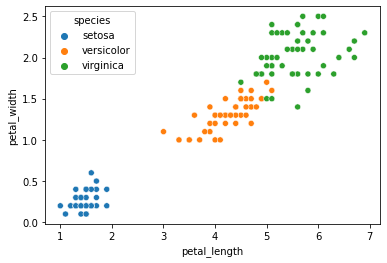

In [10]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

Din acest plot putem să vedem că o anumită specie este separată clar de restul. Speciile de plante par a fi separate în funcție de caracteristicile pe care le au, prin urmare dacă oferim ca și date de intrare pentru un model de calsificare, acesta ar trebuie să facă distincția între tipurile de specii de plante.

O să și începem partea de pregăritre de date pentru un model de Machine Learning de calsificare (multi-class classification)

In [11]:
X = df.drop('species', axis=1)
y = df['species']

In [12]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Label-urile pentru acest set de date sunt stringuri. Ceea ce este super util la Scikit-Learn este faptul că nu trebuie să encodăm aceste date pentru a le transforma în date de tip integer. 

In [13]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

În continuare o să fin nevoiți să importăm un model. Modelul pe care o să îl folosim pentru partea de multi-class Classification este tot cel de Logistic Regression. În cadrul acestui model o să realizăm și parte de Grid Search. Deși modelul de Logistic Regression are o variantă ce folosește și cross-validation (LogisticRegressionCV) o să utilizăm modelul simplu (LogisticRegression) și o să ne folosim de partea de GridSearchCV din Scikit-Learn, astfel o să mai recapitulăm partea respectivă.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Înainte am creat un model de LogisticRegression simplu, fără a specifica anumiți parametrii pentru acel model. Înainte să facem asta acuma, să aruncăm o privire peste documentația de la LogisticRegression din Scikit-Learn pentru a vedea ce fel de parametrii putem să folosim (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Pentru început vedem că există un parametru de penalty prin care putem să zicem ce tip de Regularizare să folosească acest model. Avem opțiunile de L1, L2 și ElasticNet. Dacă se folosește ElasticNet, atunci trebuie să selectăm o valoare și pentru parametrul de l1_ratio. Un alt parametru care ne interesează (poate cel mai mult pentru acest caz) este cel de multi_class. La acest parametrul avem următoarele opțiuni: 'auto', 'ovr' și 'multinominal'. Acest parametru trebuie să îl utilizăm în cazul în care dorim să avem un model care face și partea de multi-class classification.

Întrebarea care vine apare totuși, ce valoare să folosim și cum poate un model de LogisticRegression să facă predicții pentru mai multe clase? Din graficul ce l-am prezentat la începutul secțiunii, acel cu curba de LogisticRegression, modelul pare că știe să împartă setul de date doar în două clase. Prin urmare, cum realizează multi-class classification? Pentru asta trebuie să utilizăm valoarea de 'ovr' care este acronimul de la 'one vs. rest'. Din acest nume ne dăm seama că modelul ia o singură valoare din totalu de clase, iar pentru restul valorile le consideră ca fiind o singură clasă. De exemplu, pentru valorile pe care le avem mai sus (setosa versicolor, virginica ) ia prima valoare, cea de sestosa și spune dacă o instanță este de tipul sestosa sau nu. După ia valoarea de versicolo și zice dacă acea instanță aparține clasei de versicolor sau nu, urmând acest scenariu până ce verifică toate clasele.

Un alt parametru la care trebuie să ne utiăm este cel de solver, parametru prin care se alege algoritmul matematic prin care să se rezolve problema de multi-class classification. Există mai multe variațiuni de algoritmi, fiecare fiind utili pentru anumite seturi de date specifice. De reținut faptul că nu toți algoritmii matematici suportă toate tipurile de Regularizare. Pentru cazul nostru o să utilizăm algoritmul de saga care suportă și regularizarea de tipul ElasticNet. saga vine de la Sochastic Average Gradient

O să creeem un model inițial la care o să îi oferim valori pentru parametrii de solver, multi_class și max_iter

In [29]:
model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

Acestea sunt valorile care nu trebuie modificate pentru acest model. Există anumiți parametrii pentru care dorim să încercăm mai mulle valori. Pentru asta o să creem un dicționar de valori pe care o să îl pasăm la GridSearchCV ca și param_grid

In [35]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
            'l1_ratio': np.linspace(0, 1, 20),
            'C': np.logspace(0, 10, 20),
            'verbose': [0]}

După ce am creat dicționarul respectiv putem să creem un grid de modele pentru a fi testate

In [36]:
grid_model = GridSearchCV(model, param_grid)

In [37]:
grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packag

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'verbose': [0]})

In [38]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1', 'verbose': 0}

După ce s-a terminat partea de GridSearchCV putem să vedem care au fost valorile cele mai bune care au dus la cel mai bun model. Cu acest model putem acum să facem predicții și să verificăm performanța modelului respectiv. Să facem asta în continuare

In [39]:
y_pred = grid_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [42]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [43]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


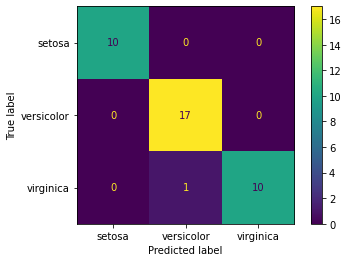

In [44]:
plot_confusion_matrix(grid_model, X_test, y_test)

Din aceste date putem să vedem că modelul a făcut predicții aproape perfect. Din totalul de valori pentru care a trebuit să facă predicții, a greșit doar 1 singură valoare, ceea ce este foarte bine pentru un astfel de model

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



Din cadrul acestui report de clasificare am putut să vedem că pentru setosa modelul a avut o precizie și un recall de 100%, ceea ce înseamnă că a funcționat perfect pentru acea clasă. La modelul inițial de LogisticRegression, cel cu clasificarea binară ne-am uitat și peste partea de ROC curve. Să încercăm să facem asta și cu modelul de multi-class Classification

In [47]:
from sklearn.metrics import plot_roc_curve

In [48]:
plot_roc_curve(grid_model, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

Dacă încercăm să creem acel plot de ROC curve pentru modelul de multi-class, atunci o să ne apară o eroare. Eroarea ne spune că pentru a putea fi creat acest plot trebuie să oferim ca și parametru un estimator care să fie de tipul binary classification, adică să clasifice doar în două clase, 0 sau 1. Modelul nostru precize 3 clase, din această cauză nu putem să facem plot la acea curbă ROC. În documentația de la Scikit-Learn este pus un cod prin care se poate să creem acest ROC curve pentru fiecare clasă în parte.

In [49]:
from sklearn.metrics import roc_curve, auc

In [55]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

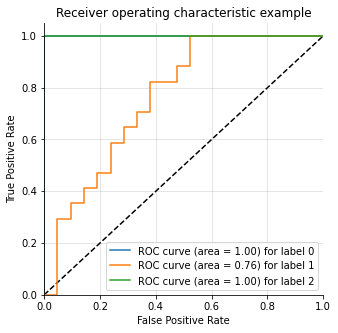

In [56]:
plot_multiclass_roc(grid_model, X_test, y_test, 3)

Cu funcția de mai sus putem să afișăm un ROC curve pentru fiecare calsă dintr-un model de Machine Learning de multi-class

## Recapitulare

În cadrul acestei părți din secțiunea de Logistic Regression am învățat următoarele lucruri:

    1. Care sunt parametrii de care avem nevoie pentru a crea un model de multi-class classification folosind Logistic Regression

        scorer='saga'

        multi_class = 'ovr'

    2. După ce am creat modelul, putem să ne folosim de GridSearchCV pentru a verifica mai multe valori pentru hyperparametrii modelului

    3. Partea de validare de model se face asemănător pentru accuracy_score, precision_score, confusion_matrix și classification_report

    4. Pentru ROC curve trebuie să utilizăm o funcție specială pentru a putea afișa toate clasele într-un singur plot